In [5]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [6]:
# load data
result_path = '../pipeline-revision/results/nsyb-G7f-r5HT1.0'
folder_name = 'mean_region_pca_DEEPCAD_formal'
acc_file = 'list_list_accuracy_br.npy'
fly_selected = [0,1,2,3,4,5,6,7,8,9]
# parameters
thresh = np.arange(0,1,0.005)
channel = np.array([0,1,2])
num_channel_choice = len(channel)
if_save = True
if_shuffle = False
# # ach
# c = ['orange','#006934','#751C77']
# 5ht
c = ['orange','#006934','#036EB8']

if if_save:
    figure_save_path = './results/' + 'p3_thresh/5HT'
    f = os.path.exists(figure_save_path)
    if not f:
        os.makedirs(figure_save_path)

In [7]:
# load data
file_folders = os.listdir(result_path)
print(file_folders)
num_fly = len(fly_selected)
yy = np.zeros((num_fly,num_channel_choice,len(thresh)))
for i in range(num_fly):
    file_folder = file_folders[fly_selected[i]]
    the_path = result_path + '/' + file_folder + '/' + folder_name
    f = os.path.exists(the_path + '/' + acc_file)
    if not f:
        continue
    acc = np.load(the_path + '/' + acc_file)
    the_acc = np.mean(np.squeeze(acc),2)
    the_label = ["Two channels","G7f","NM"]
    if not if_shuffle:
        the_acc = the_acc[:,:,0]
    else:
        the_acc = the_acc[:,:,1]
    print(np.shape(the_acc))
    yy[i,:,:] = the_acc*100

['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1', 'figures-for-revision1']
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)


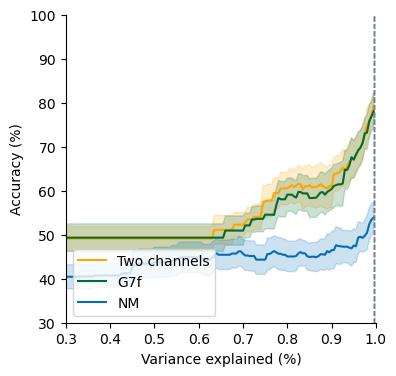

In [8]:
# plot the mean curve of the flies
mean_yy = np.mean(yy,0)
std_yy = np.std(yy,0,ddof = 1)/math.sqrt(len(fly_selected))
yy_below = mean_yy-std_yy
yy_above = mean_yy+std_yy
plt.figure(figsize = (4,4))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for j in range(num_channel_choice):
    plt.plot(thresh,mean_yy[j,:],color = c[j],label = the_label[j])
    x_fill = np.concatenate((thresh,thresh[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below[j,:],yy_above[j,::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = c[j],alpha=0.2)
    plt.plot([0.995,0.995],[30,100], '--', linewidth=1, markersize=6, color='slategray')
    plt.legend(loc = 3)
    plt.ylim((30,100))
    plt.xlim((0.3,1))
    plt.xlabel('Variance explained (%)')
    plt.ylabel('Accuracy (%)')
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'supp_p3_accuracy_thresh_curve_mean.png',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'supp_p3_accuracy_thresh_curve_mean.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()